## Load the `geoJson` file

This blogpost aims at building an hexbin map of US counties. Each county will be represented as a hexagone. The county boundaries are available [here](https://team.carto.com/u/andrew/tables/andrew.us_states_hexgrid/public/map). For your convenience I've uploaded the exact file used in this post on [github](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/data/us_states_hexgrid.geojson.json).

The coordinates are stored at `geoJson` format, probably the most common file format for this kind of information. If you want to know more about this, visit the [background map section](https://www.python-graph-gallery.com/map) of the gallery that gives a tour on how to build a map with python.

Now, let's load this `geoJson` file from the web with `geopandas`

In [73]:
# Import geopandas library
import geopandas as gpd

# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
df = gpd.read_file(url)

That's it, we now have a geo dataframe containing all the counties as hexagones. Before starting to draw a map with it, you can have a look at it with:

In [74]:
df.head(2)

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry
0,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408..."
1,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544..."


## Basic hexbin map

`GeoPlot` is probably the best python library to build a map from a geo dataframe. It is pretty straightforward thanks to its `polyplot()` function.

(-141.3782939, -66.4992721, 24.9474434, 56.75919259999999)

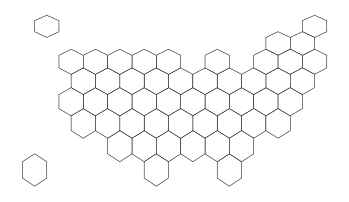

In [75]:
# Import the geoplot library.
import matplotlib.pyplot as plt

# Draw a map with polyplot
df.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off')

## Add county names

Let's add county names at the centroid of each. Fortunately, centroids are already available from the `geometry` column of the geo dataframe. For instance, you can access it for the first county with `df.head(1).geometry.centroid`.

Let's add a `centroid` column to the original dataframe:

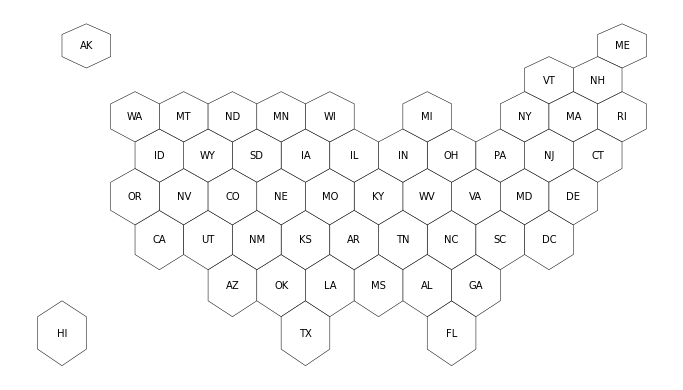

In [78]:
df['centroid'] = df['geometry'].apply(lambda x: x.centroid)

plt.rcParams["figure.figsize"]=12,12

# Draw a map with polyplot
df.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off')

for idx, row in df.iterrows():
    plt.annotate(s=row['iso3166_2'], xy=row['centroid'].coords[0], horizontalalignment='center', va='center')

#plt.figure(figsize=(24,24));

Now let's plot both the county borders and their labels at centroids position.